In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm

%matplotlib inline

In [8]:
auto = pd.read_csv('../data/Auto.csv', index_col='name', na_values='?')
auto = auto.dropna()

In [9]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [10]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
dtypes: float64(4), int64(4)
memory usage: 27.6+ KB


In [15]:
def ols(y, x):
    return sm.OLS(y, sm.add_constant(x)).fit()

In [16]:
result = ols(auto['mpg'], auto['horsepower'])
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 23 Sep 2016   Prob (F-statistic):           7.03e-81
Time:                        18:59:58   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000        38.525    41.347
horsepower    -0.1578      0.006    -24.489      0.000        -0.171    -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

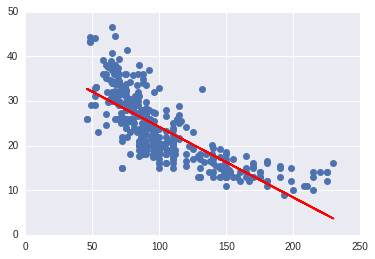

In [19]:
plt.plot(auto['horsepower'], auto['mpg'], 'o')
plt.plot(auto['horsepower'], result.fittedvalues, 'r-')

In [20]:
result = ols(auto['mpg'], auto.drop('mpg', axis=1))
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 23 Sep 2016   Prob (F-statistic):          2.04e-139
Time:                        19:03:34   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000       -26.350    -8.087
cylinders       -0.4934      0.323     -1.526      0.128        -1.129     0.142
displacement     0.0199      0.008      2.647      0.008         0.005     0.035
horsepower      -0.0170      0.014     -1.230      0.220        -0.044     0.010
weight          -0.0065      0.001     -9.929      0.000        -0.008    -0.005
acceleration     0.0806      0.099      0.815      0.415        -0.114     0.275
year             0.7508      0.051     14.729      0.000         0.651     0.851
origin           1.4261      0.278      5.127      0.000         0.879     1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
x = np.random.normal(size=100)
y = 2 * x + np.random.normal(size=100)

In [26]:
model_x_to_y = sm.OLS(y, x, hasconst=False)

In [27]:
result_x_to_y = model_x_to_y.fit()

In [28]:
result_x_to_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     499.3
Date:                Fri, 23 Sep 2016   Prob (F-statistic):           1.85e-40
Time:                        21:15:43   Log-Likelihood:                -139.77
No. Observations:                 100   AIC:                             281.5
Df Residuals:                      99   BIC:                             284.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.9713      0.088     22.345      0.000         1.796     2.146
==============================================================================
Omnibus:                        0.534   Durbin-Watson:                   2.268
Prob(Omnibus):                  0.766   Jarque-Bera (JB):                0.407
Skew:                          -0.156   Prob(JB):                        0.816
Kurtosis:                       2.982   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model_y_to_x = sm.OLS(x, y, hasconst=False)
result_y_to_x = model_y_to_x.fit()
result_y_to_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     499.3
Date:                Fri, 23 Sep 2016   Prob (F-statistic):           1.85e-40
Time:                        21:16:14   Log-Likelihood:                -62.857
No. Observations:                 100   AIC:                             127.7
Df Residuals:                      99   BIC:                             130.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4233      0.019     22.345      0.000         0.386     0.461
==============================================================================
Omnibus:                        0.693   Durbin-Watson:                   2.207
Prob(Omnibus):                  0.707   Jarque-Bera (JB):                0.776
Skew:                          -0.058   Prob(JB):                        0.678
Kurtosis:                       2.584   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

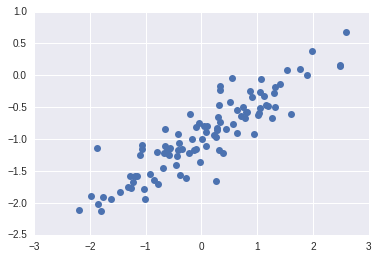

In [31]:
x = np.random.normal(size=100)
eps = np.random.normal(size=100, scale=0.25)
y = -1 + 0.5 * x + eps
plt.plot(x, y, 'o')

In [32]:
model = sm.OLS(y, sm.add_constant(x))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     406.8
Date:                Fri, 23 Sep 2016   Prob (F-statistic):           1.17e-36
Time:                        21:21:33   Log-Likelihood:                -8.6397
No. Observations:                 100   AIC:                             21.28
Df Residuals:                      98   BIC:                             26.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.9611      0.027    -36.025      0.000        -1.014    -0.908
x1             0.5116      0.025     20.169      0.000         0.461     0.562
==============================================================================
Omnibus:                        3.725   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.155   Jarque-Bera (JB):                3.857
Skew:                           0.165   Prob(JB):                        0.145
Kurtosis:                       3.904   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

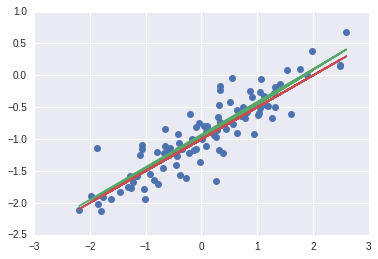

In [38]:
actual = -1 + 0.5 * x
plt.plot(x, y, 'o')
plt.plot(x, result.fittedvalues, '-')
plt.plot(x, actual, '-')

In [35]:
sqr = pd.DataFrame({'x': x, 'x^2': x * x})
result = ols(y, sqr)

In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     201.8
Date:                Fri, 23 Sep 2016   Prob (F-statistic):           2.73e-35
Time:                        21:25:02   Log-Likelihood:                -8.5519
No. Observations:                 100   AIC:                             23.10
Df Residuals:                      97   BIC:                             30.92
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.9698      0.034    -28.442      0.000        -1.038    -0.902
x              0.5098      0.026     19.707      0.000         0.458     0.561
x^2            0.0080      0.019      0.413      0.681        -0.030     0.046
==============================================================================
Omnibus:                        3.433   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                3.334
Skew:                           0.173   Prob(JB):                        0.189
Kurtosis:                       3.825   Cond. No.                         2.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

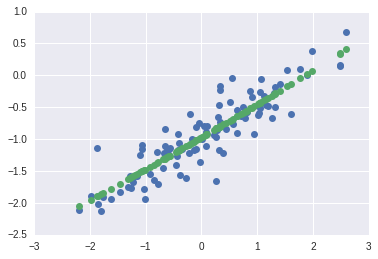

In [37]:
plt.plot(x, y, 'o')
plt.plot(x, result.fittedvalues, 'o')